In [ ]:
%pip install mlxtend --upgrade # sau khi chạy xong thì resert lại máy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


**DOWNLOAD DATASET**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules  

In [ ]:
# cd /content/drive/MyDrive/DATA MINING/final

In [ ]:
import requests, zipfile, io
zipfile.ZipFile(io.BytesIO(requests.get('http://files.grouplens.org/datasets/movielens/ml-latest-small.zip').content)).extractall()

In [ ]:
ls -a ml-latest-small

./  ../  links.csv  movies.csv  ratings.csv  README.txt  tags.csv


**Load the dataset through pandas library**

In [ ]:
movies=pd.read_csv('ml-latest-small/movies.csv')  # movies data
ratings= pd.read_csv('ml-latest-small/ratings.csv')  # ratings data
tages= pd.read_csv('ml-latest-small/tags.csv')  # tags data
movies.head(2) # movies dataset visualization

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
tages.head(2) # tags dataset visualization

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [ ]:
ratings.head(2)  # ratings dataset visualization

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


## Trực quan hóa dữ liệu ratings.csv

**Countplot of user ratings**

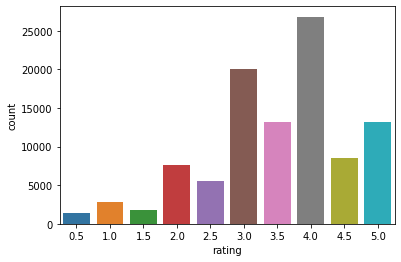

In [ ]:
sns.countplot(ratings['rating'])

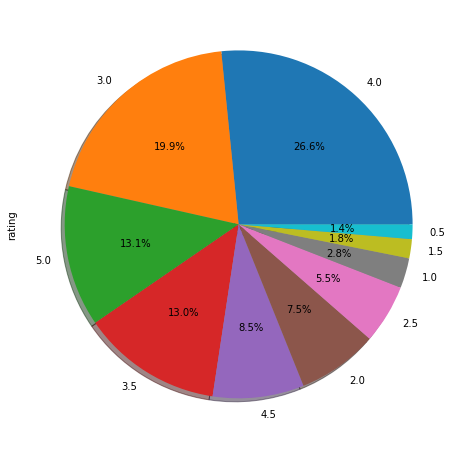

In [ ]:
# Pie Plot of Movies ratings
plt.figure(figsize=(10,8))
ratings['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
ratings=ratings[['userId','movieId','rating']] #separate columns from timestamp column
ratings_df=ratings.groupby(['userId','movieId']).agg(np.max) #Groupby data
ratings_df.head()

rating
userId movieId        
1      1           4.0
       3           4.0
       6           4.0
       47          5.0
       50          5.0

***Ở trên, dữ liệu nhóm dựa trên: Mỗi người dùng đã xem những bộ phim nào và xếp hạng bao nhiêu cho những bộ phim đó. userId 1 đã xem movieId 1, 3, 6, 47, 50, v.v. và đưa ra xếp hạng riêng cho từng phim.***

In [ ]:
ratings['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

Ở trên, user có id = 414 đánh giá tới 2698 bộ phim và 20 là số lượng đánh giá ít nhất mà mỗi user đưa ra

In [ ]:
ratings["movieId"].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

Ở khía cạnh bộ phim, phim có id = 356 đánh giá tới 329 lần trong khi rất nhiều bộ phim chỉ nhận được một đánh giá.

In [ ]:
count_ratings=ratings.groupby('rating').count() #count all ratings
count_ratings

,userId,movieId
rating,,
0.5,1370,1370
1.0,2811,2811
1.5,1791,1791
2.0,7551,7551
2.5,5550,5550
3.0,20047,20047
3.5,13136,13136
4.0,26818,26818
4.5,8551,8551


In [ ]:
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),
                                  1)
count_ratings

,userId,movieId,perc_total
rating,,,
0.5,1370,1370,1.4
1.0,2811,2811,2.8
1.5,1791,1791,1.8
2.0,7551,7551,7.5
2.5,5550,5550,5.5
3.0,20047,20047,19.9
3.5,13136,13136,13.0
4.0,26818,26818,26.6
4.5,8551,8551,8.5


 Ở trên dự đoán tỷ lệ phần trăm cho mỗi xếp hạng.

1. xếp hạng 5,0 được 13,1 %
2. xếp hạng 4,5 được 8,5 %
3. xếp hạng 4.0 được 26,6 %
4. xếp hạng 3,5 được 13,0 %
5. xếp hạng 3.0 được 19,9 %
6. xếp hạng 2,5 được 5,5 %
7. xếp hạng 2.0 được 7,5 %
8. xếp hạng 1,5 được 1,8 %
9. xếp hạng 1,0 được 2,6 %
10. xếp hạng 0,5 được 1,4 % 
-> Xếp hạng cao nhất là 4,0 và Xếp hạng thấp nhất là 0.5


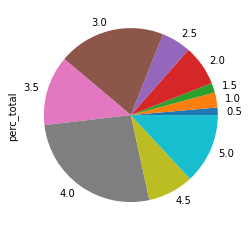

In [ ]:
# PLotting of each ratings
count_ratings['perc_total'].plot.pie()  #pie plot

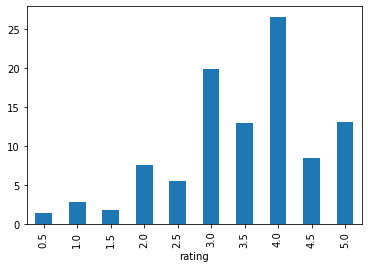

In [ ]:
count_ratings['perc_total'].plot.bar()  # bar plot

## Trực quan hóa dataset movies.csv

In [ ]:
genres=movies['genres']
genres.head()  # visualization of genres column from movie dataset

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [ ]:
genre_list=" "
for index,row in movies.iterrows():
    genre_list+=row.genres+"|"
genre_list_split=genre_list.split("|")
new_list=list(set(genre_list_split))
new_list.remove('')
new_list

['Film-Noir',
 'Thriller',
 'Action',
 ' Adventure',
 'Adventure',
 'Comedy',
 'IMAX',
 'Fantasy',
 'Horror',
 'Romance',
 'Documentary',
 'War',
 'Children',
 'Drama',
 'Musical',
 'Western',
 'Sci-Fi',
 '(no genres listed)',
 'Mystery',
 'Crime',
 'Animation']

**Ở trên, tách tất cả các thể loại phim khỏi bộ dữ liệu và sử dụng cấu trúc dữ liệu 'set' để không trùng lặp các thể loại trong cùng một bộ. Nếu ở cột '|' tìm thấy, nó sẽ phân tách các thể loại phim và loại bỏ sự trùng lặp trong cùng một bộ phim bằng cách sử dụng cấu trúc dữ liệu 'set'.**

In [ ]:
movies["num_genres"] = movies["genres"].apply(lambda x: len(x.split('|')))
movies["num_genres"].value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
8        1
10       1
Name: num_genres, dtype: int64

Hầu hết các bộ phim thuộc vào một thể loại. Số lượng thể loại nhiều nhất mà một bộ phim thuộc về là 10 và chỉ có 2 bộ phim như vậy.

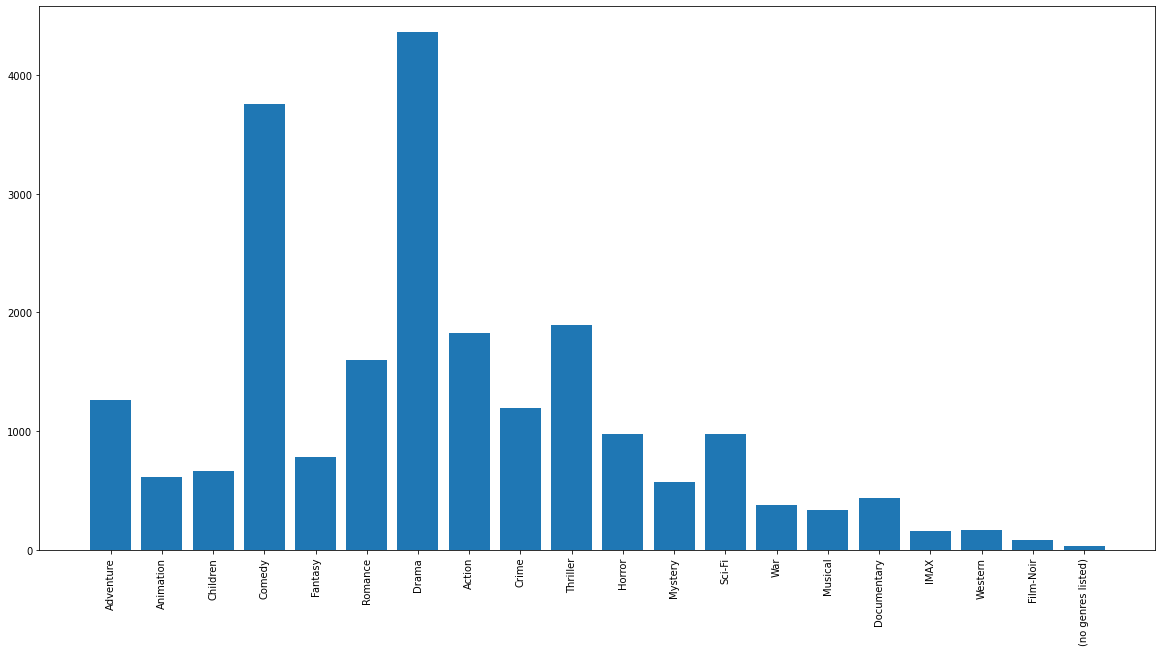

In [ ]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies["genres"]:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1
        
plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=90)
plt.show();

In [ ]:
m=movies.copy() #make a copy of movies dataset

In [ ]:
for genre in new_list:
    m[genre]=m.apply(lambda _:int(genre in _.genres),axis=1)
m.head()

,movieId,title,genres,num_genres,Film-Noir,Thriller,Action,Adventure,Adventure,Comedy,...,War,Children,Drama,Musical,Western,Sci-Fi,(no genres listed),Mystery,Crime,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Tạo một data với tiêu đề của bộ phim và thể loại của dữ liệu. Nếu thể loại của phim khớp với toàn bộ cột thì nó hiển thị 1. Giống như id phim 3 có tiêu đề là Grumpier Old Men(1995) và thể loại là Hài | Lãng mạn. Thể loại phim này rất phù hợp với chuyên mục Lãng mạn. '...' cho biết có ít cột.**

In [ ]:
avg=pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
avg # make a dataframe for each movie id with its corresponding ratings mean and count

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


In [ ]:
avg['movieId']=avg.index
avg # add the movieid column

,mean,count,movieId
movieId,,,
1,3.920930,215,1
2,3.431818,110,2
3,3.259615,52,3
4,2.357143,7,4
5,3.071429,49,5
...,...,...,...
193581,4.000000,1,193581
193583,3.500000,1,193583
193585,3.500000,1,193585


In [ ]:
np.percentile(avg['count'],70)

7.0

**Trên 70 % phim trên có số lượng trung bình là 3**

In [ ]:
np.percentile(avg['count'],50)


3.0

**Trên 50 % phim trên có số lượng trung bình là 3**

## Trực quan hóa dữ liệu tags.csv

In [ ]:
tages.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [ ]:
tages["num_tages"] = tages["tag"].apply(lambda x: len(x))
tages["num_tages"].value_counts()

6     444
5     340
9     340
11    328
8     322
7     294
10    279
12    248
13    202
16    194
17    118
14    114
4     112
15     97
18     59
3      40
19     39
21     30
20     24
22     13
23     12
27      5
24      5
36      4
41      3
26      3
2       3
31      2
63      1
28      1
35      1
39      1
85      1
48      1
40      1
43      1
37      1
Name: num_tages, dtype: int64

# MERGE DATASET

In [ ]:
merge = movies.merge(tages,on = 'movieId',how = 'inner')

In [ ]:
merge

,movieId,title,genres,num_genres,userId,tag,timestamp,num_tages
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,336,pixar,1139045764,5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,474,pixar,1137206825,5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,567,fun,1525286013,3
3,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,fantasy,1528843929,7
4,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,magic board game,1528843932,16
...,...,...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,4,62,star wars,1528934552,9
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,4,184,anime,1537098582,5
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,4,184,comedy,1537098587,6
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,4,184,gintama,1537098603,7


In [ ]:
merge.drop(columns=['tag','timestamp','genres','num_genres'],inplace=True)

In [ ]:
merge

,movieId,title,userId,num_tages
0,1,Toy Story (1995),336,5
1,1,Toy Story (1995),474,5
2,1,Toy Story (1995),567,3
3,2,Jumanji (1995),62,7
4,2,Jumanji (1995),62,16
...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),62,9
3679,193565,Gintama: The Movie (2010),184,5
3680,193565,Gintama: The Movie (2010),184,6
3681,193565,Gintama: The Movie (2010),184,7


In [ ]:
len(merge.userId.unique())  # số người dùng

58

In [ ]:
# mỗi hàng đại diện cho một user và các bộ phim đã chọn của user đó
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head() 

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


In [ ]:
merge_list = merge_list["title"].tolist()
merge_list[0:3]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)']]

In [ ]:
len(merge_list)

58

## DATA TRANSFORMATION

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
te.columns_

['(500) Days of Summer (2009)',
 '...And Justice for All (1979)',
 '10 Cloverfield Lane (2016)',
 '10 Things I Hate About You (1999)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '11\'09"01 - September 11 (2002)',
 '12 Angry Men (1957)',
 '127 Hours (2010)',
 '13 Going on 30 (2004)',
 '2001: A Space Odyssey (1968)',
 '21 Grams (2003)',
 '25th Hour (2002)',
 '28 Days Later (2002)',
 '39 Steps, The (1935)',
 '3:10 to Yuma (2007)',
 '40-Year-Old Virgin, The (2005)',
 '400 Blows, The (Les quatre cents coups) (1959)',
 '42 Up (1998)',
 '84 Charing Cross Road (1987)',
 '8MM (1999)',
 'A Million Ways to Die in the West (2014)',
 'A Pigeon Sat on a Branch Reflecting on Existence (2014)',
 'A Story of Children and Film (2013)',
 'A.I. Artificial Intelligence (2001)',
 'About a Boy (2002)',
 'Accused, The (1988)',
 "Adam's Rib (1949)",
 'Addams Family Values (1993)',
 'Addams Family, The (1991)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)

In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## GENERATING FREQUENT ITEMSETS
Phần này triển khai việc sử dụng việc tạo itemsets theo các tham số đã chọn ``` min_support=0.01,max_len=2``` làm ngưỡng để phân vùng thuật toán sử dụng kích thước bộ nhớ lớn của máy (giá trị hỗ trợ 1% và độ dài tối đa của hai mục trong mỗi hàng cũng được chọn).

### APRIORI

In [ ]:
from mlxtend.frequent_patterns import apriori
%time
apriori_frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True,max_len=2)
apriori_frequent_itemsets.head(100)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs


,support,itemsets
0,0.017241,((500) Days of Summer (2009))
1,0.017241,(...And Justice for All (1979))
2,0.017241,(10 Cloverfield Lane (2016))
3,0.017241,(10 Things I Hate About You (1999))
4,0.017241,(101 Dalmatians (1996))
...,...,...
95,0.034483,(Avatar (2009))
96,0.034483,"(Avengers, The (2012))"
97,0.034483,(Avengers: Infinity War - Part I (2018))
98,0.017241,"(Aviator, The (2004))"


In [ ]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

2    774986
1      1572
Name: itemsets, dtype: int64

### Fpgrowth

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head(100)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


,support,itemsets
0,0.051724,(Step Brothers (2008))
1,0.034483,"(Wolf of Wall Street, The (2013))"
2,0.017241,(Warrior (2011))
3,0.051724,"(Departed, The (2006))"
4,0.034483,"(Godfather: Part II, The (1974))"
...,...,...
95,0.017241,(Saw (2004))
96,0.017241,(Very Bad Things (1998))
97,0.017241,(Vicky Cristina Barcelona (2008))
98,0.017241,(Zack and Miri Make a Porno (2008))


In [ ]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

2    774986
1      1572
Name: itemsets, dtype: int64

<a id="section-two"></a>

## ANAYSIS TO THE RESULTS

In [ ]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1,0.034483,"(Wolf of Wall Street, The (2013))",1
2,0.017241,(Warrior (2011)),1
3,0.051724,"(Departed, The (2006))",1
4,0.034483,"(Godfather: Part II, The (1974))",1
...,...,...,...
776553,0.017241,"(Shine (1996), Night of the Shooting Stars (No...",2
776554,0.017241,"(Staying Alive (1983), Night of the Shooting S...",2
776555,0.017241,"(Gladiator (2000), Night of the Shooting Stars...",2
776556,0.017241,"(I'm Not Scared (Io non ho paura) (2003), Nigh...",2


In [ ]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > 1)
                          & (fpgrowth_frequent_itemsets['support'] > 0.06)].head()

,support,itemsets,length
5225,0.068966,"(Eternal Sunshine of the Spotless Mind (2004),...",2
5392,0.086207,"(Donnie Darko (2001), Eternal Sunshine of the ...",2
5394,0.068966,"(Donnie Darko (2001), Memento (2000))",2
7011,0.068966,"(Donnie Darko (2001), Blade Runner (1982))",2
7012,0.068966,"(Blade Runner (1982), Memento (2000))",2


In [ ]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] != 1)]


,support,itemsets,length
1572,0.034483,"(Step Brothers (2008), Anchorman: The Legend o...",2
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2
1574,0.017241,"(Step Brothers (2008), City of God (Cidade de ...",2
1575,0.017241,"(Step Brothers (2008), Departed, The (2006))",2
1576,0.017241,"(Step Brothers (2008), Terminator 2: Judgment ...",2
...,...,...,...
776553,0.017241,"(Shine (1996), Night of the Shooting Stars (No...",2
776554,0.017241,"(Staying Alive (1983), Night of the Shooting S...",2
776555,0.017241,"(Gladiator (2000), Night of the Shooting Stars...",2
776556,0.017241,"(I'm Not Scared (Io non ho paura) (2003), Nigh...",2


In [ ]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'] == {'Step Brothers (2008)', 'Corpse Bride (2005)'}]

,support,itemsets,length
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2


In [ ]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'Step Brothers (2008)' in str(x))]

,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1572,0.034483,"(Step Brothers (2008), Anchorman: The Legend o...",2
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2
1574,0.017241,"(Step Brothers (2008), City of God (Cidade de ...",2
1575,0.017241,"(Step Brothers (2008), Departed, The (2006))",2
...,...,...,...
10131,0.017241,"(Step Brothers (2008), Prisoners (2013))",2
10201,0.017241,"(Step Brothers (2008), Old School (2003))",2
10272,0.017241,"(Step Brothers (2008), Now You See Me (2013))",2
10344,0.017241,"(Step Brothers (2008), Night at the Roxbury, A...",2


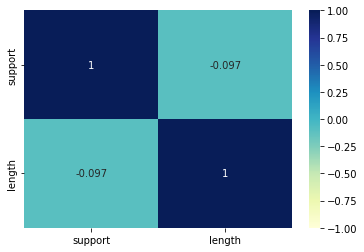

In [ ]:
import seaborn as sns
sns.heatmap(data=fpgrowth_frequent_itemsets.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='YlGnBu');

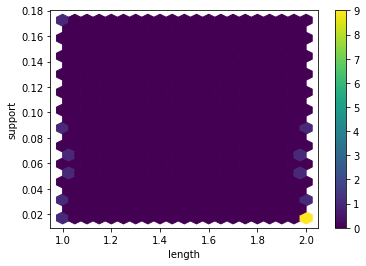

In [ ]:
fpgrowth_frequent_itemsets.plot.hexbin(x='length',y='support',cmap='viridis',gridsize=20,sharex=False,bins=10);

## ASSOCIATION RULES

In [ ]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.01)

CPU times: user 13.2 s, sys: 350 ms, total: 13.6 s
Wall time: 13.6 s


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Step Brothers (2008)),(Anchorman: The Legend of Ron Burgundy (2004)),0.051724,0.068966,0.034483,0.666667,9.666667,0.030916,2.793103
1,(Anchorman: The Legend of Ron Burgundy (2004)),(Step Brothers (2008)),0.068966,0.051724,0.034483,0.500000,9.666667,0.030916,1.896552
2,(Step Brothers (2008)),(Corpse Bride (2005)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
3,(Corpse Bride (2005)),(Step Brothers (2008)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
4,(Step Brothers (2008)),(City of God (Cidade de Deus) (2002)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
...,...,...,...,...,...,...,...,...,...
1549967,(Night of the Shooting Stars (Notte di San Lor...,(Gladiator (2000)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549968,(I'm Not Scared (Io non ho paura) (2003)),(Night of the Shooting Stars (Notte di San Lor...,0.034483,0.017241,0.017241,0.500000,29.000000,0.016647,1.965517
1549969,(Night of the Shooting Stars (Notte di San Lor...,(I'm Not Scared (Io non ho paura) (2003)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549970,(Hard-Boiled (Lat sau san taam) (1992)),(John Wick: Chapter Two (2017)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf


In [ ]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].sort_values(ascending=False,by='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1534852,(Inception (2010)),(Gentlemen Broncos (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538021,(Inception (2010)),(Rare Exports: A Christmas Tale (Rare Exports)...,0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538287,(Inception (2010)),((500) Days of Summer (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538321,(Inception (2010)),"(Avengers, The (2012))",0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034
1538361,(Inception (2010)),(Captain Phillips (2013)),0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034
...,...,...,...,...,...,...,...,...,...
37,(Inception (2010)),(Step Brothers (2008)),0.068966,0.051724,0.017241,0.25,4.833333,0.013674,1.264368
6183,(Inception (2010)),(Pulp Fiction (1994)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379
10875,(Inception (2010)),(Fight Club (1999)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379
461,(Inception (2010)),(Anchorman: The Legend of Ron Burgundy (2004)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379


In [ ]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents        consequents                                             
(Inception (2010)) (Gentlemen Broncos (2009))                          14.5
                   (Life Aquatic with Steve Zissou, The (2004))        14.5
                   (400 Blows, The (Les quatre cents coups) (1959))    14.5
                   (A Pigeon Sat on a Branch Reflecting on Existen...  14.5
                   (Arrival (2016))                                    14.5
                   (Andalusian Dog, An (Chien andalou, Un) (1929))     14.5
                   (Angel's Egg (Tenshi no tamago) (1985))             14.5
                   (Illusionist, The (2006))                           14.5
                   (Dunkirk (2017))                                    14.5
                   (Don't Breathe (2016))                              14.5

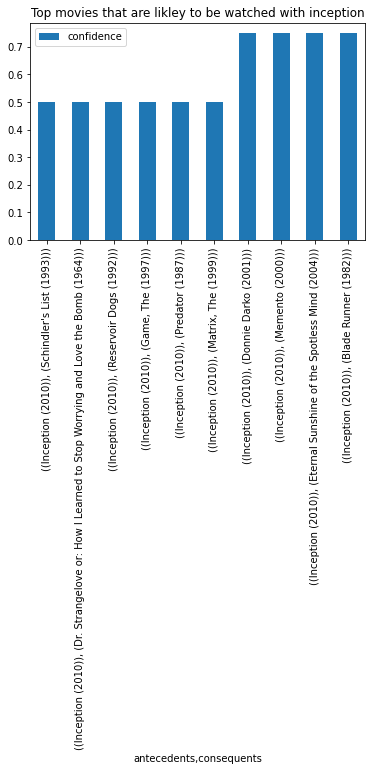

In [ ]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');